In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from matplotlib import pyplot

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


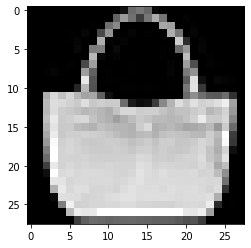

In [ ]:
(feature_train, label_train), (feature_test, label_test) = fashion_mnist.load_data()

print("Train", feature_train.shape, label_train.shape)
print("Test", feature_test.shape, label_test.shape)

pyplot.imshow(feature_train[100], cmap=pyplot.get_cmap('gray'))

## Feature Engineering

In [ ]:
feature_train = feature_train.reshape((feature_train.shape[0], 28, 28, 1))
feature_test = feature_test.reshape((feature_test.shape[0], 28, 28, 1))

In [ ]:
print(feature_train.shape)

(60000, 28, 28, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical

label_train = to_categorical(label_train)
label_test = to_categorical(label_test)

print(label_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
feature_train = feature_train.astype('float32')
feature_test = feature_test.astype('float32')

feature_train = feature_train / 255.0
feature_test = feature_test / 255.0

In [ ]:
feature_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [ ]:
# Adapted from: https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

base_model = Sequential()

base_model.add(Flatten(input_shape=(28, 28, 1)))
base_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
base_model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

opt = SGD(lr=0.01, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

base_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

base_model.summary()

base_model.fit(feature_train, label_train, batch_size=32, validation_data=(feature_test, label_test), epochs=10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5262 - accuracy: 0.8132 - val_loss: 0.4354 - val_accuracy: 0.8428
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3956 - accuracy: 0.8583 - val_loss: 0.4111 - val_accuracy: 0.8499
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3602 - accurac

In [ ]:
loss, accuracy = base_model.evaluate(feature_test,  label_test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss:", loss)

313/313 - 1s - loss: 0.3411 - accuracy: 0.8779
Test accuracy: 0.8779000043869019
Test loss: 0.3410598039627075


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) # Convolution, 32 filters, masing-masing dengan kernel 3x3

model.add(MaxPooling2D((2, 2))) # Pooling

model.add(Flatten()) # Flatten hasil output

# Fully connected layer
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

opt = SGD(lr=0.01, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

model.summary()

model.fit(feature_train, label_train, batch_size=32, validation_data=(feature_test, label_test), epochs=10)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4081 - accuracy: 0.8551 - val_loss: 

In [ ]:
loss, accuracy = model.evaluate(feature_test,  label_test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss:", loss)

313/313 - 1s - loss: 0.3080 - accuracy: 0.9044
Test accuracy: 0.9043999910354614
Test loss: 0.3080386817455292
